末尾表現についてEDA、MLを行っていく
コード

In [1]:
import pandas as pd 
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
Mdf=pd.read_csv('./末尾.csv', engine='python')
# Fdf=pd.read_csv('./末尾_file毎.csv', engine='python')
Fdf=pd.read_csv('./形容詞_file毎.csv', engine='python')

In [132]:
Fdf['sum_word']=Fdf.sum(axis=1).astype(int)

In [133]:
Fdf['sum_word'].describe(percentiles=[.1,.24,.3,.4,.5,.6,.75,.8,.9,.93,.96,.99])

count      324.000000
mean       179.666667
std       1082.496581
min          1.000000
10%          1.000000
24%          2.000000
30%          3.000000
40%          5.000000
50%          7.000000
60%         12.800000
75%         49.000000
80%         62.200000
90%        260.700000
93%        467.230000
96%        680.800000
99%       2217.850000
max      17911.000000
Name: sum_word, dtype: float64

In [158]:
NFdf=Fdf[(Fdf.sum_word<20000 )& (Fdf.sum_word>1)]

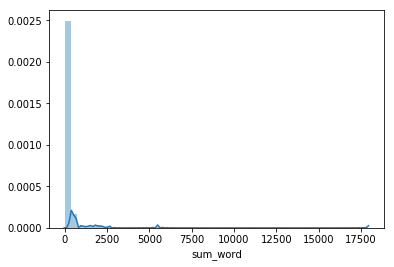

In [159]:
sns.distplot(NFdf.sum_word,kde = True)
plt.show()


In [160]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [161]:
Nfdf=NFdf.drop(columns=['sum_word']).reset_index(drop=True).T
INfdf=Nfdf[Nfdf.index.str.contains('一致')]
INfdf['label']=1
INfdf.loc[INfdf.index.str.contains('一致減'),'label']=0

INfdf2=Nfdf[Nfdf.index.str.contains('先行')]
INfdf2['label']=1
INfdf2.loc[INfdf2.index.str.contains('先行減'),'label']=0

INfdf3=Nfdf[Nfdf.index.str.contains('遅行')]
INfdf3['label']=1
INfdf3.loc[INfdf3.index.str.contains('遅行減'),'label']=0

c:\users\icech\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\icech\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
c:\users\icech\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a co

In [162]:
# INFdf=INfdf.reset_index(inplace=True,drop=True)
INfdf3

,0,1,2,3,4,5,6,7,8,9,...,273,274,275,276,277,278,279,280,281,label
遅行増2001-12-01_koi_1,0,0,0,14,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
遅行増2002-10-01_koi_1,0,0,0,53,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,1
遅行増2002-11-01_koi_1,0,0,0,68,0,0,0,1,0,5,...,0,0,1,0,0,8,0,0,0,1
遅行増2003-04-01_koi_1,0,0,0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
遅行増2003-06-01_koi_1,0,0,2,56,0,0,0,0,0,1,...,0,0,0,0,0,6,0,0,0,1
遅行増2003-09-01_koi_1,0,0,0,10,0,0,0,0,0,2,...,0,0,0,0,0,10,0,0,0,1
遅行増2004-01-01_koi_1,0,0,0,11,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
遅行増2004-01-01_koi_2,0,0,2,34,0,0,0,0,0,1,...,0,0,0,0,0,8,0,0,0,1
遅行増2004-03-01_koi_1,0,0,0,40,0,0,0,0,0,5,...,0,0,2,0,0,0,0,0,0,1
遅行増2004-03-01_koi_2,0,0,0,47,0,0,0,0,0,7,...,0,0,0,0,0,1,0,0,0,1


In [163]:
target=INfdf['label']
INfdf=INfdf.drop(columns=['label'])

target2=INfdf2['label']
INfdf2=INfdf2.drop(columns=['label'])

target3=INfdf3['label']
INfdf3=INfdf3.drop(columns=['label'])

In [164]:
import sklearn.cross_validation as crv
train_data, test_data, train_target, test_target = crv.train_test_split(INfdf.values, target.values, random_state=42)
 

In [165]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
clf = MultinomialNB()
y_pred=cross_val_score(clf,INfdf.values, target.values,cv=10)
y2_pred=cross_val_score(clf,INfdf2.values, target2.values,cv=10)
y3_pred=cross_val_score(clf,INfdf3.values, target3.values,cv=10)

In [166]:
clf2 = RandomForestClassifier()
y_pred2=cross_val_score(clf2,INfdf.values, target.values,cv=10)
y2_pred2=cross_val_score(clf2,INfdf2.values, target2.values,cv=10)
y3_pred2=cross_val_score(clf2,INfdf3.values, target3.values,cv=10)

In [167]:
# import xgboost as xgb
# clf3 = xgb.XGBClassifier()
# y_pred3=cross_val_score(clf3,INfdf.values, target.values,cv=10)

In [168]:
print(y_pred.mean(),
y2_pred.mean(),
y3_pred.mean(),)

0.6000915750915751 0.552972027972028 0.6136363636363635


In [169]:
print(y_pred2.mean(),
y2_pred2.mean(),
y3_pred2.mean())

0.4883699633699633 0.5544871794871795 0.486969696969697


In [36]:
y_pred3.mean()

0.5121794871794872

In [77]:
print (classification_report(target.values,y_pred)) 

NameError: name 'classification_report' is not defined

In [278]:
INfdf2=INfdf.reset_index(drop=True)

In [279]:
INfdf2

,0,1,2,3,4,5,6,7,8,9,...,4756,4757,4758,4759,4760,4761,4762,4763,4764,label
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [265]:
train_data, test_data, train_target, test_target = crv.train_test_split(INfdf2.values, target.values, random_state=42)
clf3.fit(INfdf2,target)
fti=clf3.feature_importances_
print('Feature Importances:')
# for i, feat in enumerate(x1.columns):
#     print('\t{0:10s} : {1:>.6f}'.format(feat, fti[i]))
    
plt.figure(figsize=(6, 15))
plt.barh(train_data, fti)    

TypeError: sequence item 0: expected str instance, int found

In [257]:
train_data

array([[1.0, 0.0, 0.0, ..., 0.0, 0.0, 1],
       [1.0, 0.0, 0.0, ..., 0.0, 0.0, 1],
       [1.0, 0.0, 0.0, ..., 0.0, 0.0, 0],
       ...,
       [1.0, 0.0, 0.0, ..., 0.0, 0.0, 0],
       [1.0, 0.0, 0.0, ..., 0.0, 0.0, 1],
       [1.0, 0.0, 0.0, ..., 0.0, 0.0, 0]], dtype=object)